In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

In [2]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # Initialize model
        self.initial_prediction = np.mean(y)

        # vector 
        predictions = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            # Compute pseudo-residuals
            residuals = y - predictions

            # Fit a tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Update predictions
            predictions += self.learning_rate * tree.predict(X)

            # Save the tree
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions



In [3]:

# Generate synthetic data
np.random.seed(42)  # for reproducibility
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(100) * 0.1  # noisy sine wave

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = gbr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009084454184217447


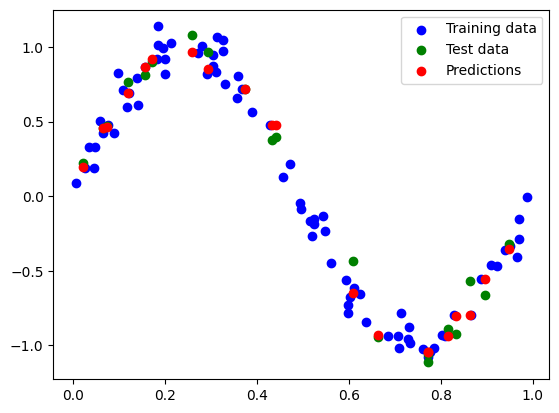

In [4]:

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, label="Training data", color="blue")
plt.scatter(X_test, y_test, label="Test data", color="green")
plt.scatter(X_test, predictions, label="Predictions", color="red")
plt.legend()
plt.show()